## import libs

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import NearestNeighbors

# data set creation 

In [3]:
data = {
    'destination_name': [
        'Beach Paradise', 'Mountain Retreat', 'City Lights', 'Cultural Hub', 'Seaside Escape',
        'Hilltop Haven', 'Urban Jungle', 'Quiet Countryside', 'Adventure Land', 'Historical Sites',
        'Coastal Getaway', 'Nature Reserve'
    ],
    'destination_type': [
        'Beach', 'Mountain', 'City', 'City', 'Beach', 'Mountain', 'City', 'Rural', 'Mountain', 'City',
        'Beach', 'Rural'
    ],
    'popularity': [
        0.9, 0.8, 0.7, 0.6, 0.85, 0.75, 0.65, 0.5, 0.8, 0.55, 0.7, 0.6
    ],
    'cost': [
        0.8, 0.6, 0.9, 0.5, 0.75, 0.65, 0.85, 0.4, 0.7, 0.6, 0.7, 0.3
    ],
    'rating': [
        4.5, 4.2, 4.0, 3.8, 4.7, 4.3, 4.1, 3.5, 4.4, 3.9, 4.6, 4.0
    ]
}


# Create a DataFrame
df = pd.DataFrame(data)

# Save DataFrame to CSV
df.to_csv('travel_destinations.csv', index=False)

# Load the dataset
df = pd.read_csv('travel_destinations.csv')

# Display the first few rows of the dataset
print(df.head())

   destination_name destination_type  popularity  cost  rating
0    Beach Paradise            Beach        0.90  0.80     4.5
1  Mountain Retreat         Mountain        0.80  0.60     4.2
2       City Lights             City        0.70  0.90     4.0
3      Cultural Hub             City        0.60  0.50     3.8
4    Seaside Escape            Beach        0.85  0.75     4.7


In [4]:
# Check for missing values
print(df.isnull().sum())


destination_name    0
destination_type    0
popularity          0
cost                0
rating              0
dtype: int64


In [5]:
# Handle missing values
df.fillna(df.mean(), inplace=True)

# Verify no missing values remain
print(df.isnull().sum())

destination_name    0
destination_type    0
popularity          0
cost                0
rating              0
dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_12472\4172672683.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


In [6]:
# Basic statistics about the dataset
print(df.describe())

       popularity       cost     rating
count   12.000000  12.000000  12.000000
mean     0.700000   0.645833   4.166667
std      0.124316   0.178960   0.352480
min      0.500000   0.300000   3.500000
25%      0.600000   0.575000   3.975000
50%      0.700000   0.675000   4.150000
75%      0.800000   0.762500   4.425000
max      0.900000   0.900000   4.700000


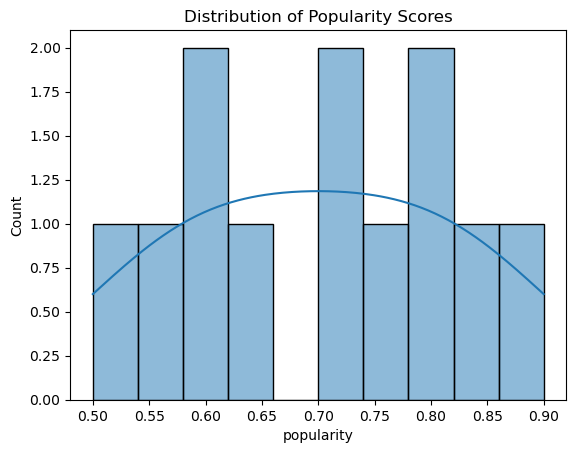

In [7]:
# Visualize the distribution of popularity
sns.histplot(df['popularity'], bins=10, kde=True)
plt.title('Distribution of Popularity Scores')
plt.show()

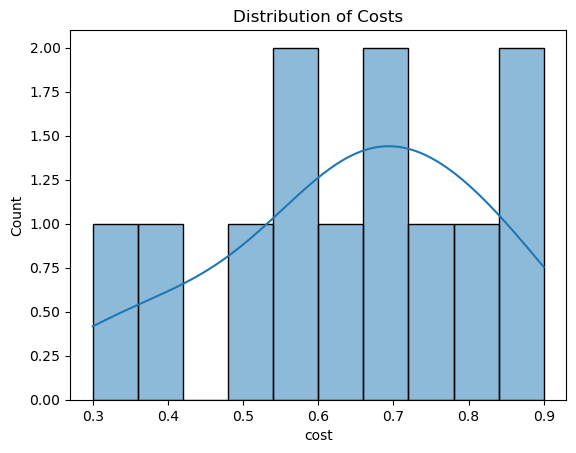

In [8]:
# Visualize the distribution of cost
sns.histplot(df['cost'], bins=10, kde=True)
plt.title('Distribution of Costs')
plt.show()

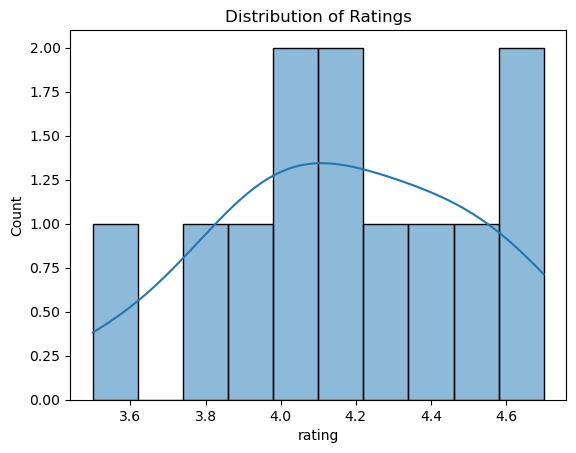

In [9]:
# Visualize the distribution of ratings
sns.histplot(df['rating'], bins=10, kde=True)
plt.title('Distribution of Ratings')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_12472\2006941134.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


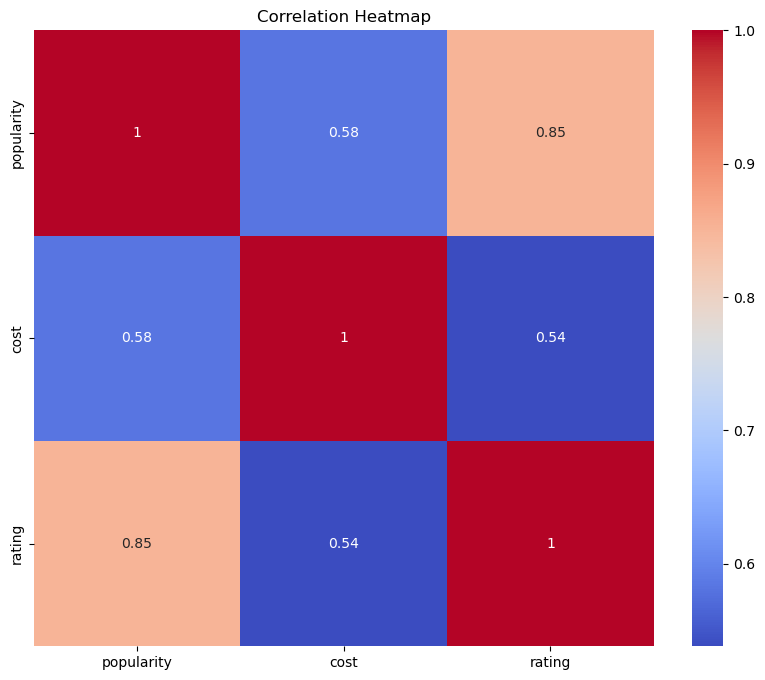

In [10]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

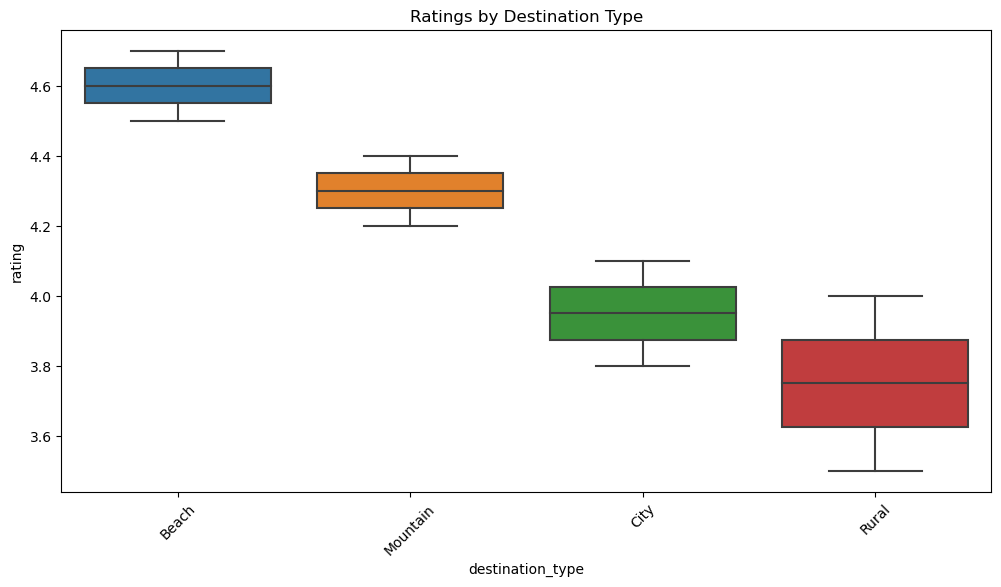

In [11]:
# Boxplot for destination types vs. ratings
plt.figure(figsize=(12, 6))
sns.boxplot(x='destination_type', y='rating', data=df)
plt.title('Ratings by Destination Type')
plt.xticks(rotation=45)
plt.show()

In [12]:
# Encode categorical variables
label_encoder = LabelEncoder()
df['destination_type'] = label_encoder.fit_transform(df['destination_type'])

# Normalize numerical features
scaler = StandardScaler()
df[['destination_type', 'popularity', 'cost', 'rating']] = scaler.fit_transform(df[['destination_type', 'popularity', 'cost', 'rating']])

print(df.head())

   destination_name  destination_type    popularity      cost    rating
0    Beach Paradise         -1.297771  1.680336e+00  0.899767  0.987730
1  Mountain Retreat          0.648886  8.401681e-01 -0.267498  0.098773
2       City Lights         -0.324443 -9.327739e-16  1.483399 -0.493865
3      Cultural Hub         -0.324443 -8.401681e-01 -0.851131 -1.086503
4    Seaside Escape         -1.297771  1.260252e+00  0.607950  1.580367


In [13]:
# Features and target
features = df[['destination_type', 'popularity', 'cost', 'rating']]
target = df['destination_name']

# Fit the KNN model
knn = NearestNeighbors(n_neighbors=5)
knn.fit(features)

NearestNeighbors()

In [14]:
# Define user preferences
user_preferences = {
    'destination_type': 'Beach',
    'popularity': 0.8,
    'cost': 0.5,
    'rating': 0.9
}

# Encode and normalize user preferences
user_input = [
    label_encoder.transform([user_preferences['destination_type']])[0],
    user_preferences['popularity'],
    user_preferences['cost'],
    user_preferences['rating']
]

In [15]:
# Ensure the input is reshaped correctly for scaler
user_input = scaler.transform([user_input])

D:\data-science\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [16]:
# Find similar destinations
distances, indices = knn.kneighbors(user_input)

D:\data-science\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


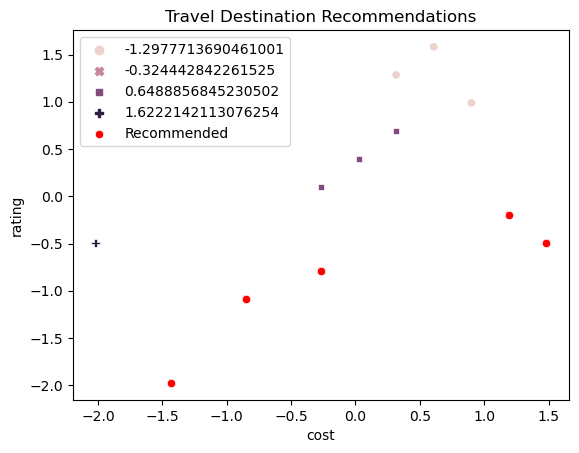

In [17]:
# Visualize the recommendations
recommended_df = df.iloc[indices[0]]
sns.scatterplot(data=df, x='cost', y='rating', hue='destination_type', style='destination_type')
sns.scatterplot(data=recommended_df, x='cost', y='rating', color='red', label='Recommended')
plt.title('Travel Destination Recommendations')
plt.show()